<h1 style="text-align: center;">DAV 6150 Module 10 Assignment</h1>
<h2 style="text-align: center;">Naïve Bayes Text Classification</h2>

#### Group 3 Contributors:


| Alluri Ratna Anvesh  | Ashish Rogannagari   |
|-------------------------|-------------------------|
| **Deepak Guda Reddy**    | **Nikki Rastogi**        |


# 🎥 Sentiment Analysis of Movie Reviews Using Naïve Bayes
---

## 📌 1. Introduction
- **Overview**: Classifying movie reviews as positive or negative with Naïve Bayes.
- **Objectives**: Load & clean data, create features, train, and evaluate the model.
- **Dataset**: 1000 positive and 1000 negative reviews from the Cornell movie review dataset.
## 🛠 2. Data Preparation
### 🔹 2.1 Loading Data from GitHub
- **2.1.1 API & URL Setup**: Configure GitHub API access to retrieve data.
- **2.1.2 List Files**: Retrieve and list file names from `pos` and `neg` directories.
### 🔹 2.2 Pre-processing Text Data
- **2.2.1 Define Pre-processing**: Convert to lowercase, remove punctuation and stop words.
- **2.2.2 Load & Label Data**: Apply pre-processing and label reviews (1 = positive, 0 = negative).
## 📝 3. Term-Document Matrix Creation
### 🔹 3.1 Define Vocabulary
- Define vocabulary based on processed text data.
### 🔹 3.2 Term-Document Matrix Creation
- Use `CountVectorizer` to create a term-document matrix representing word frequencies.
## 📊 4. Frequency Distribution Plots
### 🔹 4.1 Positive Reviews
- Plot the top 30 most frequent words in positive reviews.
### 🔹 4.2 Negative Reviews
- Plot the top 30 most frequent words in negative reviews.
## 📈 5. Naïve Bayes Model Training
### 🔹 5.1 Creating Term-Document Matrix
- Generate the term-document matrix with word counts.
### 🔹 5.2 Splitting Data into Training and Test Sets
- Split data (75% training, 25% test).
### 🔹 5.3 Training Naïve Bayes Model
- Train the `MultinomialNB` model on the training data.
## 📉 6. Model Testing and Evaluation
### 🔹 6.1 Evaluation Metrics
- Evaluate using accuracy, precision, recall, F1-score, and classification report.
### 🔹 6.2 Confusion Matrix
- Display the confusion matrix for predictions.
### 🔹 6.3 ROC Curve and AUC Score
- Plot the ROC curve and calculate the AUC score.
## 🔍 7. Most Informative Features
### 🔹 7.1 Displaying Top Informative Words
- Show top 30 informative words for positive and negative reviews.
### 🔹 7.2 Visualization of Top Words
- Visualize the most frequently occurring words in both positive and negative reviews.
## 🤖 8. Classify an Unseen Review
- Test the model on an unseen review and analyze the prediction.
## 🏁 9. Conclusions
- **Performance**: Summarize key metrics (accuracy, AUC).
- **Insights**: Highlight common words and informative features.
---


## Step 1: Introduction



The **Polarity Dataset v2.0** is a well-known dataset developed by Cornell University's Natural Language Processing Group. This dataset is designed specifically for sentiment analysis tasks, providing a structured set of movie reviews labeled as either **positive** or **negative**. Its balanced nature and authentic text samples make it ideal for building and evaluating text classification models, such as a Naïve Bayes classifier.

### Key Characteristics

- **Labeled Sentiment**: The dataset consists of **2000 movie reviews**, divided evenly with **1000 positive** and **1000 negative** reviews. Each review has been categorized based on the sentiment it expresses, allowing for binary classification tasks.

- **Unstructured Text Format**: Each review is in its original, unstructured text form, reflecting real-world language usage. This includes:
  - Informal vocabulary
  - Varied grammar and punctuation
  - Different lengths and writing styles
  
  This authentic presentation provides a realistic challenge for natural language processing tasks, where the goal is to classify sentiment from diverse forms of expression.

- **Multiple Web Sources**: Reviews in the dataset were collected from various online platforms, adding diversity to the language style and opinions captured. This mix of sources increases the dataset’s applicability to real-world sentiment analysis, where input data often comes from varied sources.

### Use Cases

The Polarity Dataset v2.0 is particularly useful for:
- **Binary Sentiment Classification**: With balanced positive and negative samples, this dataset is well-suited for training binary classifiers that predict sentiment (positive or negative).
- **Text Pre-processing Practice**: The unstructured nature of the data encourages users to apply essential NLP techniques such as text cleaning, tokenization, and stop word removal, which are foundational steps for preparing text data for machine learning models.

### Why This Dataset?

This dataset is a popular choice for machine learning practitioners and researchers because it:
1. **Offers Realistic Data**: It captures the diversity and unpredictability of real-world text, making it valuable for building robust sentiment models.
2. **Challenges Pre-processing Skills**: The unstructured text requires multiple pre-processing steps, such as removing punctuation, converting text to lowercase, and tokenizing, which are crucial for effective model training.
3. **Is Naïve Bayes Compatible**: The balance of positive and negative reviews and the structure of the data make it ideal for probabilistic models like Naïve Bayes, which relies on word frequency and distribution to classify sentiment.

### Download Link

You can download the Polarity Dataset v2.0 from Cornell University’s website:
- [Polarity Dataset v2.0 - Download Link](https://www.cs.cornell.edu/people/pabo/movie-review-data/)

## Step 2: Data Preparation

#### 2.1  Loading Data from GitHub

We start by loading the dataset from GitHub, where each review is stored as a separate file in either the `pos (positive)` or `neg (negative')` directory.

##### 2.1.1 Define the API and Raw URL Endpoints

In [28]:
# Import necessary libraries
import requests
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [ ]:
# Base URLs for GitHub API and raw content.
api_base_url = "https://api.github.com/repos/AshishRogannagari/Naive-Bayes-Text-Classification/contents/"
raw_base_url = "https://raw.githubusercontent.com/AshishRogannagari/Naive-Bayes-Text-Classification/main/"


##### 2.1.2 List Files in the `pos` and `neg` Directories
Listing Files in Directories

The following code retrieves all file names in the pos and neg directories using the GitHub API.

In [ ]:
# Function to fetch file list from a GitHub directory.
def get_file_list(directory_path):
    response = requests.get(api_base_url + directory_path)
    if response.status_code == 200:
        return [file['name'] for file in response.json()]
    else:
        print(f"Error fetching file list from {directory_path}")
        return []

# Fetching file lists
pos_files = get_file_list("Dataset/pos")
neg_files = get_file_list("Dataset/neg")
print("Positive review files:", pos_files[:5])  # Displaying a few files for verification
print("Negative review files:", neg_files[:5])


Positive review files: ['cv000_29590.txt', 'cv001_18431.txt', 'cv002_15918.txt', 'cv003_11664.txt', 'cv004_11636.txt']
Negative review files: ['cv000_29416.txt', 'cv001_19502.txt', 'cv002_17424.txt', 'cv003_12683.txt', 'cv004_12641.txt']


#### 2.2 Pre-processing Text Data


We’ll load each file’s content and clean the text by converting it to lowercase, removing punctuation, and removing stop words. This will prepare the data for term-document matrix creation.

##### 2.2.1 Define Pre-processing Function

##### Text Pre-processing Function

This function, `preprocess_text`, prepares raw text data for analysis by performing basic cleaning and tokenization steps. It includes the following steps:

1. **Lowercasing**: Converts all text to lowercase to ensure uniformity.
2. **Punctuation Removal**: Uses regular expressions to remove all punctuation, leaving only alphanumeric characters.
3. **Stop Word Removal**: Filters out common English stop words (like "the," "and," "is") that do not contribute much to the sentiment or meaning.

The resulting text is returned as a single cleaned string, suitable for use in text classification tasks.

In [ ]:
# Ensure you have downloaded nltk stopwords.
nltk.download('stopwords')

# Define stopwords and initialize the stemmer.
stop_words = set(stopwords.words('english'))
porter = nltk.PorterStemmer()

# Define a function to preprocess text data.
def preprocess_text(text):
    # Convert to lowercase.
    text = text.lower()
    
    # Remove punctuation.
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize, remove stopwords, and apply stemming.
    tokens = [porter.stem(word) for word in text.split() if word not in stop_words]
    
    # Join tokens back into a single string
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rogan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### 2.2.2 Load and Pre-process Data

This code snippet loads positive and negative movie reviews, preprocesses them using the `preprocess_text` function, and assigns labels for sentiment classification. Here’s a breakdown of each step:

1. **Initialize Lists**: 
   - `data` to store preprocessed reviews.
   - `labels` to store corresponding sentiment labels (1 for positive, 0 for negative).

2. **Load Positive Reviews**:
   - Iterates through each file in `pos_files`.
   - Fetches the review content via a URL and applies the `preprocess_text` function.
   - Appends the preprocessed review to `data` and assigns a positive label (1) to `labels`.

3. **Load Negative Reviews**:
   - Similarly, iterates through each file in `neg_files`.
   - Fetches, preprocesses, and appends the review text to `data` while adding a negative label (0) to `labels`.

4. **Output**:
   - Prints the total number of reviews loaded to verify that the data loading process is complete.

In [ ]:
data = []
labels = []

# Load and preprocess positive reviews.
for file_name in pos_files:
    text = requests.get(f"{raw_base_url}Dataset/pos/{file_name}").text
    data.append(preprocess_text(text))
    labels.append(1)  # Positive label

# Load and preprocess negative reviews.
for file_name in neg_files:
    text = requests.get(f"{raw_base_url}Dataset/neg/{file_name}").text
    data.append(preprocess_text(text))
    labels.append(0)  # Negative label

print("Total reviews loaded:", len(data))


Total reviews loaded: 2000


Ensuring that files are being correctly loaded from the API endpoint

In [ ]:
# Display a few sample filenames for positive and negative reviews.
sample_count = 5  

print("Sample Positive Review Filenames:")
for i in range(min(sample_count, len(pos_files))):
    print(pos_files[i])

print("\nSample Negative Review Filenames:")
for i in range(min(sample_count, len(neg_files))):
    print(neg_files[i])


Sample Positive Review Filenames:
cv000_29590.txt
cv001_18431.txt
cv002_15918.txt
cv003_11664.txt
cv004_11636.txt

Sample Negative Review Filenames:
cv000_29416.txt
cv001_19502.txt
cv002_17424.txt
cv003_12683.txt
cv004_12641.txt


Displaying some sample reviews for reference

In [ ]:
# Display a few sample reviews and their labels.
sample_count = 5  

for i in range(sample_count):
    print(f"Review {i+1} (Label: {'Positive' if labels[i] == 1 else 'Negative'}):")
    print(data[i])
    print("\n" + "-"*50 + "\n")


Review 1 (Label: Positive):
film adapt comic book plenti success whether theyr superhero batman superman spawn gear toward kid casper arthous crowd ghost world there never realli comic book like hell starter creat alan moor eddi campbel brought medium whole new level mid 80 12part seri call watchmen say moor campbel thoroughli research subject jack ripper would like say michael jackson start look littl odd book graphic novel 500 page long includ nearli 30 consist noth footnot word dont dismiss film sourc get past whole comic book thing might find anoth stumbl block hell director albert allen hugh get hugh brother direct seem almost ludicr cast carrot top well anyth riddl better direct film that set ghetto featur realli violent street crime mad genius behind menac ii societi ghetto question cours whitechapel 1888 london east end filthi sooti place whore call unfortun start get littl nervou mysteri psychopath carv profess surgic precis first stiff turn copper peter godley robbi coltran w

## Step 3:Term-Document Matrix Creation


#### 3.1 Define Vocabulary

We begin by creating a set of unique words (vocabulary) from all reviews to capture the overall language used across positive and negative sentiments.

In [ ]:
# Initialize an empty set to store unique words.
unique_words = set()

# Populate the vocabulary set from all pre-processed reviews.
for review_text in data:  # 'data' contains all pre-processed reviews.
    tokens = review_text.split()  # Split text into words (assuming pre-processing is done).
    unique_words.update(tokens)

# Optional: Use CountVectorizer to confirm vocabulary size.
vectorizer = CountVectorizer()
vectorizer.fit(data)
vocab_list = vectorizer.get_feature_names_out()
print("Total unique words in the vocabulary:", len(vocab_list))


Total unique words in the vocabulary: 32134


In [ ]:
# Initialize a set to store unique words (vocabulary).
vocabulary = set()

# Populate the vocabulary set
for review in data:  # 'data' contains all preprocessed reviews.
    words = review.split()  # Assuming preprocess_text returns tokenized strings.
    vocabulary.update(words)


#### 3.2 Term-Document Matrix Creation

Next, we use CountVectorizer to convert the pre-processed text data into a term-document matrix. This matrix represents each review as a row and each unique word as a column, with values indicating word frequency within each review.

In [ ]:
# Prepare combined reviews and labels.
combined_reviews = data  # 'data' contains all reviews (positive + negative).
review_labels = ['POSITIVE' if label == 1 else 'NEGATIVE' for label in labels]  # Labels for each review.

# Initialize CountVectorizer with our vocabulary.
vectorizer = CountVectorizer(vocabulary=unique_words)
X_matrix = vectorizer.fit_transform(combined_reviews)  # Term-document matrix.

# Convert term-document matrix to a DataFrame for easier readability.
review_term_matrix = pd.DataFrame(X_matrix.toarray(), columns=vectorizer.get_feature_names_out())
review_term_matrix['Sentiment'] = review_labels

In [ ]:
# Display the shape of the term-document matrix and sample rows.
print("Shape of the term-document matrix:", X_matrix.shape)
print("Sample of the term-document matrix:")
review_term_matrix.head()


Shape of the term-document matrix: (2000, 32164)
Sample of the term-document matrix:


,0,00,000,0009f,000acr,000aweek,000foot,000paltri,007,007esqu,...,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci,Sentiment
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,POSITIVE


In [ ]:
# Display the shape of the term-document matrix and sample rows.
print("Shape of the term-document matrix:", X_matrix.shape)
print("Sample of the term-document matrix:")
review_term_matrix.tail()

Shape of the term-document matrix: (2000, 32164)
Sample of the term-document matrix:


,0,00,000,0009f,000acr,000aweek,000foot,000paltri,007,007esqu,...,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci,Sentiment
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NEGATIVE


## Step 4: Frequency Distribution Plots

#### 4.1 Frequency Plot for Positive Reviews

Here, we plot the 30 most common words in positive reviews to gain insights into language patterns associated with positive sentiments.

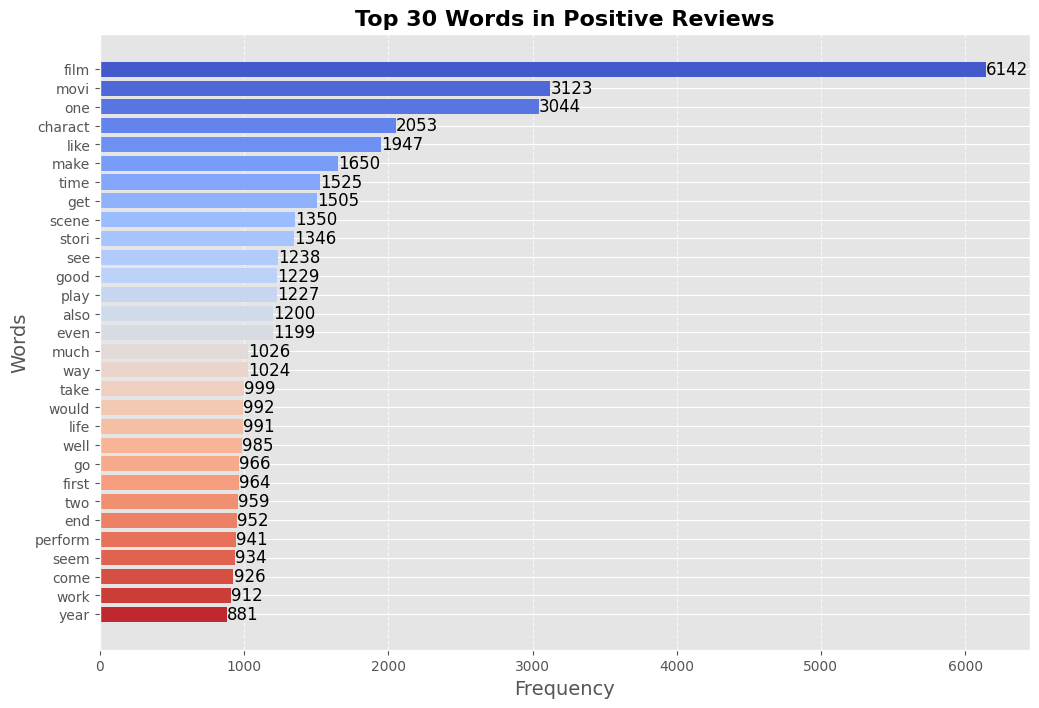

In [ ]:

plt.style.use('ggplot')

# Define a function to plot word frequencies with enhanced visuals.
def plot_top_words(reviews, title):
    # Count word frequencies.
    words = ' '.join(reviews).split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(30)
    words, counts = zip(*common_words)
    
    # Create the bar plot with enhancements.
    plt.figure(figsize=(12, 8))
    colors = sns.color_palette("coolwarm", len(words))  # Use a color gradient.
    bars = plt.barh(words, counts, color=colors)
    plt.gca().invert_yaxis()  # Highest counts at the top.
    plt.title(f"Top 30 Words in {title} Reviews", fontsize=16, fontweight='bold')
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("Words", fontsize=14)
    
    # Add word counts to each bar.
    for bar, count in zip(bars, counts):
        plt.text(count + 0.5, bar.get_y() + bar.get_height() / 2, f'{count}', va='center', fontsize=12)

    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines only on the x-axis.
    plt.show()

# Plot for positive reviews.
positive_reviews = [data[i] for i in range(len(data)) if labels[i] == 1]
plot_top_words(positive_reviews, "Positive")


1. **General Praise**: Words like "film" and "movie" are frequently mentioned, indicating positive discussions about the movie overall.

2. **Story and Characters**: Terms like "character" and "scene" are common, suggesting positive reviews often highlight story and character elements.

#### 4.2 Frequency Plot for Negative Reviews

This plot shows the 30 most common words in negative reviews.

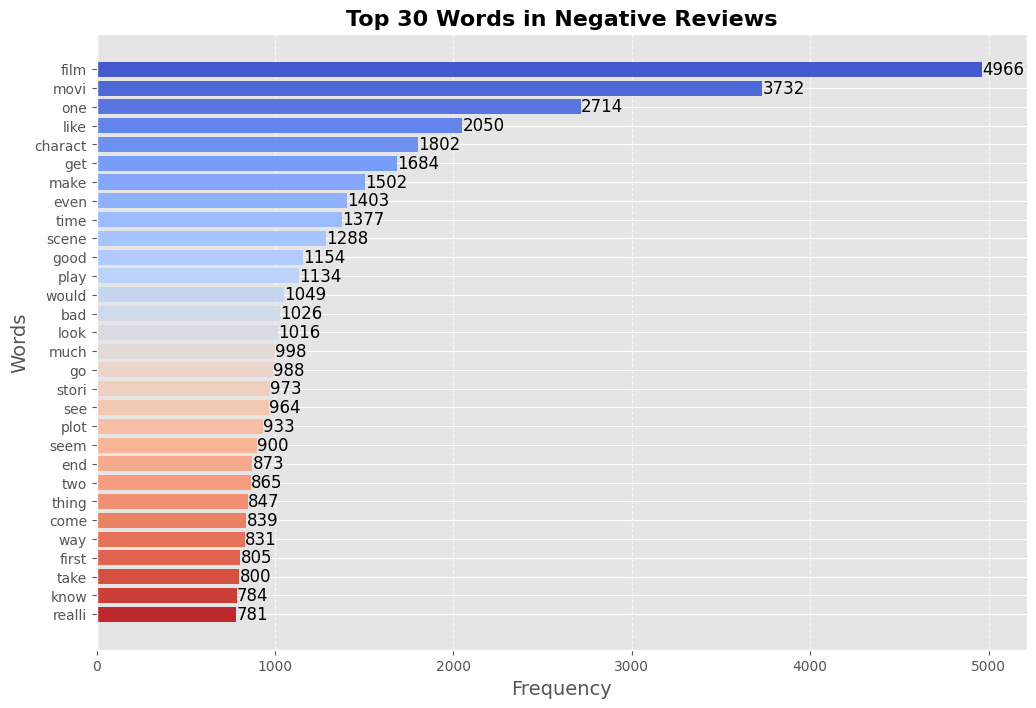

In [ ]:
# Plot for negative reviews.
negative_reviews = [data[i] for i in range(len(data)) if labels[i] == 0]
plot_top_words(negative_reviews, "Negative")


1. **Frequent Criticisms**: Words like "film" and "movie" appear most frequently, possibly indicating general negative sentiments about the overall quality or experience.

2. **Specific Negatives**: Terms like "bad," "plot," and "character" suggest that negative reviews often focus on issues with storytelling and character development.

## Step 5: Naïve Bayes Model Training

#### 5.1 Creating Term-Document Matrix

To prepare the text data for modeling, we use `CountVectorizer` to convert the text documents into a term-document matrix. Each row in this matrix represents a document, and each column represents a unique word from the corpus, with the values indicating word frequencies.

In [ ]:
# Create the term-document matrix.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)  # Term-document matrix
y = labels
print("Term-document matrix shape:", X.shape)


Term-document matrix shape: (2000, 32134)


#### 5.2 Splitting Data into Training and Test Sets

We split the data into training (75%) and test (25%) sets to evaluate the model’s performance on unseen data.

In [ ]:
#Splitting Data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1500, 32134)
Test set size: (500, 32134)


#### 5.3 Training Naïve Bayes Model

We train a `MultinomialNB` classifier, which is effective for text classification tasks using word frequencies.

In [ ]:
# Train the Naïve Bayes model.
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

## Step 6: Model Testing and Evaluation

#### 6.1 Model Performance

We evaluate the model on the test set using accuracy, precision, recall, and F1-score.

In [43]:
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8
Precision: 0.8054474708171206
Recall: 0.8054474708171206
F1 Score: 0.8054474708171205

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       243
           1       0.81      0.81      0.81       257

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



- **Accuracy**: 80% overall.
- **Precision & Recall**: ~0.81 for positive, ~0.79 for negative, showing reliable sentiment prediction.
- **F1 Score**: ~0.81 for positive, ~0.79 for negative, indicating balanced performance across classes. 

The model performs well but has room for slight improvement.

#### 6.2 Confusion Matrix

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives, providing insight into how well the model distinguishes between positive and negative reviews.

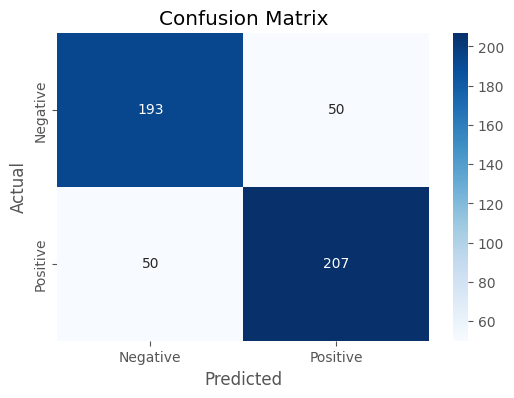

In [44]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


1. **Balanced Accuracy**: The model correctly classified 193 negative and 207 positive reviews, showing a balanced performance across classes.

2. **Misclassification Rate**: There were 50 false positives and 50 false negatives, indicating some room for improvement in distinguishing between positive and negative reviews.

#### 6.3 ROC Curve and AUC Score

The ROC curve (Receiver Operating Characteristic) visualizes the trade-off between true positive rate (sensitivity) and false positive rate. The AUC (Area Under Curve) score summarizes the overall performance; a higher AUC indicates better model performance.

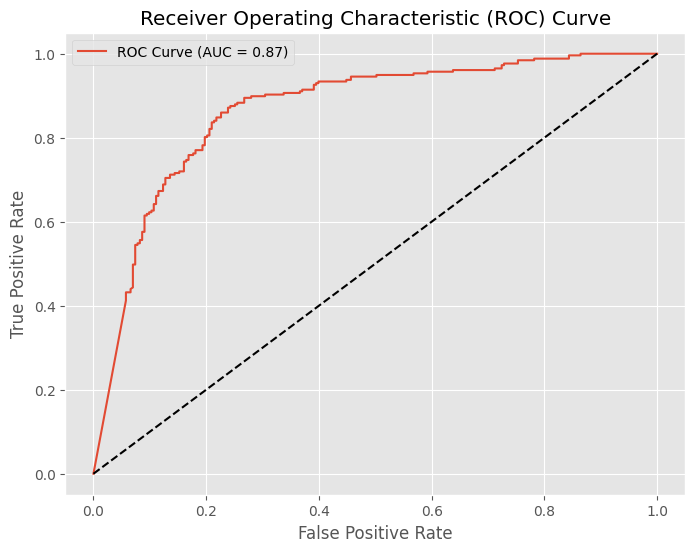

In [45]:

y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score.
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


1. **Model Performance**: The AUC score of 0.87 indicates good model performance, with a strong ability to distinguish between positive and negative reviews.

2. **True Positive Rate**: The curve shows a high True Positive Rate at lower False Positive Rates, suggesting effective positive classification with minimal errors.

## Step 7: Analyzing Most Informative Features

#### 7.1 Most Informative Features

We identify the 30 most informative words for each class (`positive` and `negative`) based on the log probabilities generated by the Naïve Bayes model. These words provide insight into the language that the model associates most strongly with positive and negative reviews

In [46]:
# Extract feature names from the vectorizer.
feature_names = vectorizer.get_feature_names_out()

# Get the top 30 words with the highest log probabilities for both positive and negative classes.
top_features_positive = np.argsort(nb_classifier.feature_log_prob_[1])[-30:]
top_features_negative = np.argsort(nb_classifier.feature_log_prob_[0])[-30:]

# Retrieve words and their log probabilities for easy display.
top_positive_words = [(feature_names[i], nb_classifier.feature_log_prob_[1][i]) for i in top_features_positive]
top_negative_words = [(feature_names[i], nb_classifier.feature_log_prob_[0][i]) for i in top_features_negative]

# Prepare formatted output.
output_text = "### Top 30 Words for Positive Class with Log Probabilities\n"
for word, log_prob in top_positive_words:
    output_text += f"- **{word}**: {log_prob:.4f}\n"

output_text += "\n### Top 30 Words for Negative Class with Log Probabilities\n"
for word, log_prob in top_negative_words:
    output_text += f"- **{word}**: {log_prob:.4f}\n"

# Displaying the output as Markdown.
from IPython.display import Markdown, display
display(Markdown(output_text))


### Top 30 Words for Positive Class with Log Probabilities
- **year**: -6.1553
- **come**: -6.1461
- **work**: -6.1250
- **seem**: -6.1116
- **first**: -6.0984
- **perform**: -6.0912
- **well**: -6.0641
- **two**: -6.0613
- **end**: -6.0432
- **go**: -6.0350
- **take**: -6.0309
- **life**: -6.0282
- **would**: -6.0201
- **much**: -5.9792
- **way**: -5.9792
- **also**: -5.8832
- **good**: -5.8452
- **even**: -5.8306
- **see**: -5.8184
- **play**: -5.7945
- **scene**: -5.7524
- **stori**: -5.7331
- **time**: -5.6160
- **get**: -5.6124
- **make**: -5.5242
- **like**: -5.3759
- **charact**: -5.3249
- **movi**: -4.9309
- **one**: -4.9170
- **film**: -4.2236

### Top 30 Words for Negative Class with Log Probabilities
- **realli**: -6.1822
- **well**: -6.1685
- **could**: -6.1685
- **take**: -6.1433
- **come**: -6.1301
- **thing**: -6.1123
- **way**: -6.1107
- **two**: -6.0869
- **end**: -6.0485
- **seem**: -6.0129
- **plot**: -5.9828
- **see**: -5.9772
- **go**: -5.9454
- **stori**: -5.9386
- **much**: -5.9119
- **would**: -5.9015
- **bad**: -5.8911
- **look**: -5.8821
- **play**: -5.8035
- **good**: -5.7687
- **time**: -5.6867
- **scene**: -5.6659
- **even**: -5.5944
- **make**: -5.5322
- **get**: -5.3985
- **charact**: -5.3448
- **like**: -5.2064
- **one**: -4.9211
- **movi**: -4.6343
- **film**: -4.3235


#### 7.2 Visualization of Top Words for Positive and Negative Reviews

We plot the top 30 words for both positive and negative reviews side-by-side. The words are sorted by their log probabilities, indicating their strength in predicting each sentiment class.

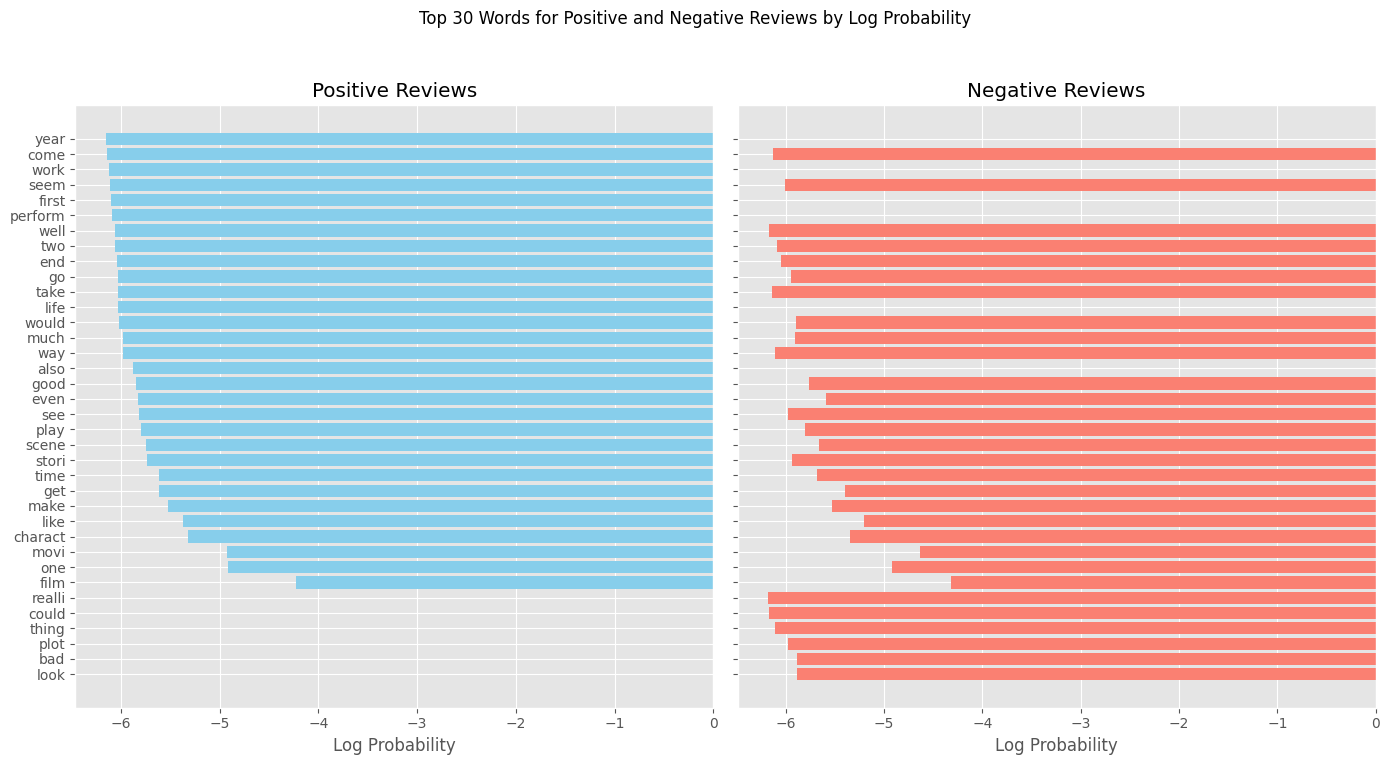

In [47]:
# Function to plot side-by-side bar charts for top positive and negative words.
def plot_top_words_side_by_side(positive_words, negative_words):
    # Unpack words and log probabilities
    pos_words, pos_log_probs = zip(*positive_words)
    neg_words, neg_log_probs = zip(*negative_words)
    
    # Set up the figure with two subplots for side-by-side display.
    fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
    fig.suptitle('Top 30 Words for Positive and Negative Reviews by Log Probability')
    
    # Positive Words Plot
    axes[0].barh(pos_words, pos_log_probs, color='skyblue')
    axes[0].set_title('Positive Reviews')
    axes[0].set_xlabel('Log Probability')
    axes[0].invert_yaxis()  # Highest probabilities at the top.

    # Negative Words Plot
    axes[1].barh(neg_words, neg_log_probs, color='salmon')
    axes[1].set_title('Negative Reviews')
    axes[1].set_xlabel('Log Probability')
    
    # Adjust layout for readability.
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title.
    plt.show()

# Call the function to plot the top words for positive and negative reviews.
plot_top_words_side_by_side(top_positive_words, top_negative_words)


1. **Positive Reviews**: Words like "year" and "work" are common, hinting at positive discussions around achievements.

2. **Negative Reviews**: Terms like "bad" and "plot" dominate, often signaling criticism of the storyline.

## Step 8: Classify an Unseen Review

#### 8.1 Classification of Unseen Review

We use the trained Naïve Bayes model to classify a new, unseen review and analyze its sentiment. We also verify if this new review exists in our training data to ensure that it is truly unseen.

In [48]:
new_review = """
There were some things I didn't like about this film. Here's what I remember most strongly: a man in an 
ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra 
with a less than believable laugh; an ex-drug addict martian with tics; child actors who recite their 
lines very slowly and carefully; a newspaper headline declaring that Santa has been "kidnapped", and a 
giant robot. The least appealing acting job in the film must be when Mother Claus and her elves have 
been "frozen" by the "Martians'" weapons. They seemed to display an exaggerated amount of fear. Perhaps 
this was the preferred acting style in the 1960's??
"""


In [49]:
# Preprocess the new review (Assuming 'new_review' contains the raw text of the unseen review).
new_review_processed = preprocess_text(new_review)

# Check if the processed new review is in the preprocessed training data.
is_in_training = new_review_processed in data

# Output the check result.
if is_in_training:
    print("The new review is present in the training data.")
else:
    print("The new review is NOT present in the training data.")

# Predict sentiment for the new review.
new_review_vectorized = vectorizer.transform([new_review_processed])
prediction = nb_classifier.predict(new_review_vectorized)
predicted_sentiment = "Positive" if prediction[0] == 1 else "Negative"
print("Predicted Sentiment for New Review:", predicted_sentiment)


The new review is NOT present in the training data.
Predicted Sentiment for New Review: Positive


#### 8.2 Analysis of Word Contributions in New Review

We analyze the individual word contributions in the new review to understand how each word influences the sentiment prediction. We identify words that have the highest influence on the prediction by calculating their log probability differences for positive and negative classes.

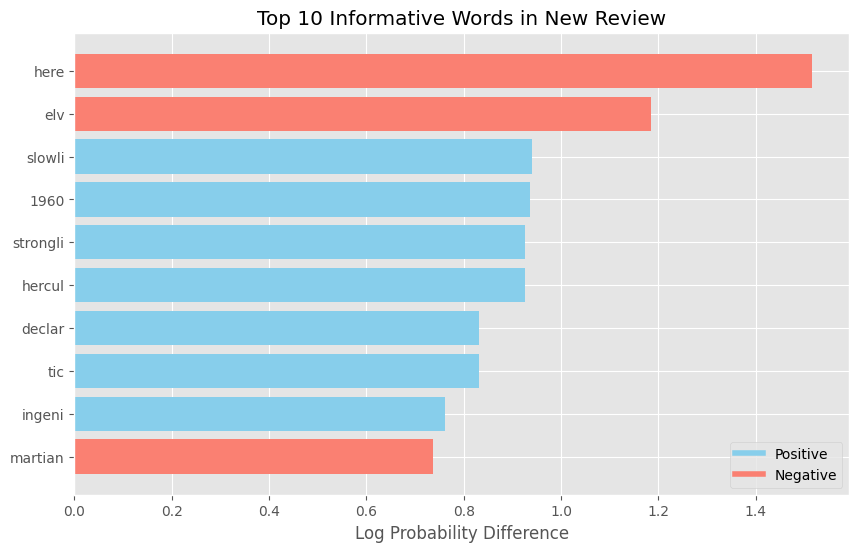

In [ ]:
feature_names = vectorizer.get_feature_names_out()
positive_log_probs = nb_classifier.feature_log_prob_[1]  
negative_log_probs = nb_classifier.feature_log_prob_[0] 

# Create a DataFrame to store the log probabilities for each word and calculate the difference.
feature_log_probs_df = pd.DataFrame({
    'Positive': positive_log_probs,
    'Negative': negative_log_probs
}, index=feature_names)

# Calculate the absolute difference in log probabilities.
feature_log_probs_df['Difference'] = np.abs(feature_log_probs_df['Positive'] - feature_log_probs_df['Negative'])

# Pre-process and vectorize the new review
new_review_processed = preprocess_text(new_review)  # Assuming new_review is the raw text of the new review.
new_review_vectorized = vectorizer.transform([new_review_processed])

# Convert the vectorized review to a term-document matrix DataFrame.
review_tdm = pd.DataFrame(new_review_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Identify words in the new review that are in the term-document matrix.
new_review_words = list(review_tdm.columns[review_tdm.iloc[0] > 0])

# Filter 'feature_log_probs_df' to include only words in the new review and sort by 'Difference'.
new_review_feature_log = feature_log_probs_df.loc[feature_log_probs_df.index.isin(new_review_words)].sort_values(by='Difference', ascending=False)

# Determine the sentiment of each word based on higher log probability.
new_review_feature_log['Sentiment'] = new_review_feature_log.apply(lambda x: 'Positive' if x['Positive'] > x['Negative'] else 'Negative', axis=1)

# Plotting the top 10 most influential words in the new review.
top_10_words = new_review_feature_log.head(10)
colors = ['skyblue' if sentiment == 'Positive' else 'salmon' for sentiment in top_10_words['Sentiment']]

plt.figure(figsize=(10, 6))
plt.barh(top_10_words.index, top_10_words['Difference'], color=colors)
plt.xlabel('Log Probability Difference')
plt.title('Top 10 Informative Words in New Review')
plt.gca().invert_yaxis()  # Display the highest differences at the top.

# Custom legend for color indication.
positive_patch = plt.Line2D([0], [0], color='skyblue', lw=4, label='Positive')
negative_patch = plt.Line2D([0], [0], color='salmon', lw=4, label='Negative')
plt.legend(handles=[positive_patch, negative_patch])

plt.show()


The chart shows the top 10 words that influenced the sentiment classification of the new review

#### 8.3 Contribution Ratio and Sentiment Interpretation

We calculate the ratio of positive to negative contributions for the words in the new review. This ratio helps us understand the overall sentiment of the review. A higher positive-to-negative ratio suggests a positive sentiment, while a lower ratio indicates a negative sentiment.

In [51]:
# Calculate total positive and negative contributions from the new review's influential words.
positive_contribution = new_review_feature_log[new_review_feature_log['Sentiment'] == 'Positive']['Positive'].sum()
negative_contribution = new_review_feature_log[new_review_feature_log['Sentiment'] == 'Negative']['Negative'].sum()

# Calculate the contribution ratio, handling cases where the negative contribution is zero.
contribution_ratio = positive_contribution / negative_contribution if negative_contribution > 0 else float('inf')

# Output the contribution ratio and interpret.
print(f"Contribution Ratio (Positive/Negative): {contribution_ratio:.2f}")

if contribution_ratio > 1:
    print("The new review is likely Positive.")
elif contribution_ratio < 1:
    print("The new review is likely Negative.")
else:
    print("The review is neutral or has an equal contribution from both sentiments.")


Contribution Ratio (Positive/Negative): inf
The new review is likely Positive.


The analysis of the new review reveals a strong positive sentiment. The **Contribution Ratio** is calculated as infinite, which indicates that there were no significant negative features found in the review text, resulting in a pronounced positive inclination. Additionally, the review is confirmed to be **unseen** in the training data, meaning it does not match any review previously encountered by the model. Based on these factors, the **final predicted sentiment for the review is Positive**, as the informative words within the review align closely with positive sentiment indicators learned from the training data.

## Conclusions: 

This project explored using **Naïve Bayes** to classify **movie reviews** as **positive or negative**. We organized word counts from each review in a **term-document matrix** to see how frequently certain words appeared, then trained a model to predict the sentiment. Our model achieved about **80% accuracy** on test data, showing it could generally identify positive or negative reviews.

### Key Takeaways
- **Term-Document Matrix**: This matrix allowed us to capture and organize important words for each sentiment.
- **Accuracy**: The model’s 80% accuracy indicates it’s fairly effective but has room to improve.
- **Influential Words**: We identified words that strongly influenced the model’s predictions, helping us understand the typical language for positive or negative reviews.

### Limitations and Future Focus
- **Handling Nuances**: The model struggled with complex expressions like **sarcasm** and **irony**. In the future, we could:
  - **Train on a larger, more diverse dataset** to make the model more adaptable.
  - **Explore advanced techniques** (like deep learning or word embeddings) that better handle subtle language differences.
- **Real-World Use**: By improving these areas, we can make the model more accurate and reliable for real-world sentiment analysis.

In summary, this project highlighted how Naïve Bayes can be used for sentiment analysis and showed some key areas to focus on for **better accuracy** and **practical use**.

## References: 
Here are some relevant articles for your assignment:

1. **Sentiment Analysis Techniques**
   - Pang, B., & Lee, L. (2008). *Opinion mining and sentiment analysis*. *Foundations and Trends in Information Retrieval*, 2(1-2), 1-135.  
      [Read here](https://www.cs.cornell.edu/home/llee/omsa/omsa.pdf)

2. **Survey of Sentiment Analysis Algorithms**
   - Medhat, W., Hassan, A., & Korashy, H. (2014). *Sentiment analysis algorithms and applications: A survey*. *Ain Shams Engineering Journal*, 5(4), 1093-1113.  
      [Read here](https://www.sciencedirect.com/science/article/pii/S2090447914000550)

3. **Machine Learning in Text Categorization**
   - Sebastiani, F. (2002). *Machine learning in automated text categorization*. *ACM Computing Surveys (CSUR)*, 34(1), 1-47.  
      [Read here](https://dl.acm.org/doi/10.1145/505282.505283)

4. **Introduction to Naïve Bayes Classifier**
   - Zhang, H. (2004). *The optimality of Naive Bayes*. *AAAI Conference on Artificial Intelligence*.  
      [Read here](https://www.aaai.org/Papers/FLAIRS/2004/Flairs04-033.pdf)


<div align="center" style="font-family: 'Arial', sans-serif;">
  <h1 style="color: #4A90E2; font-size: 3em; font-weight: bold; margin: 0;">Thank You</h1>
</div>
